In [227]:
!pip install pandas duckdb matplotlib seaborn

import pandas as pd
import duckdb
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [228]:
file_path = '../tpc_xeon_perf.csv'
# if you want to recreate tpc_xeon
# file_path = '../tpc_xeon.csv'
if os.path.exists(file_path):
    df = pd.read_csv(file_path, sep=",")
else:
    raise FileNotFoundError(f"The file {file_path} does not exist.")

key_year = 'model_launch_year'
key_spec_perf = "median_spec_int_perf"
key_perf = "perf_times_cores"
key_perf_per_tdp = "perf_per_tdp"
key_tdp = "TDP/CPU (W)"
key_cores_per_cpu = "cores_per_cpu"
key_cores = "cores"
key_processors = "processors"

In [229]:
# print(df.columns)
# df.drop(columns=[key_perf_per_tdp], inplace=True)
# print(df.columns)

/var/folders/z4/3bk11y114tn3lh60qlpnzh6m0000gn/T/ipykernel_70729/121578514.py:34: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom=0)


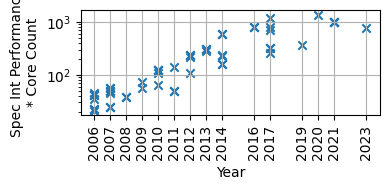

In [234]:
figsize = (4, 2)
x_rotation = 90

# if you want to recreate tpc_xeon
# df = df[~df[key_spec_perf].isna()]

# df[key_processors] = df[key_processors].astype(int)
# df[key_cores_per_cpu] = df[key_cores] / df[key_processors]
# df[key_perf] = df[key_spec_perf] * df[key_cores_per_cpu]
# df[key_perf_per_tdp] = df[key_perf] / df[key_tdp]
# df.to_csv("../tpc_xeon_perf.csv", header=True)

# print(df)

df = df.sort_values(by=key_year)

x_val = key_year
y_val = key_perf

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df[x_val], df[y_val], marker='x')

plt.xlabel('Year')
plt.ylabel("Spec Int Performance\n* Core Count")

ax.set_yscale('log')

# ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.set_xticks(df[x_val].unique())
ax.set_xticklabels(df[x_val].unique())

plt.title('')
plt.xticks(rotation=x_rotation)
plt.ylim(bottom=0)
plt.grid(True)
plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.15, left=0.15, right=0.95)
plt.savefig("../figures/tcp_cpus_perf.pdf", bbox_inches='tight')
plt.show()
plt.close()


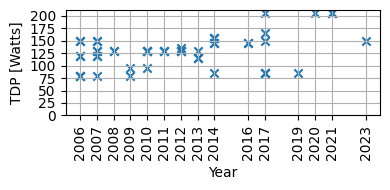

In [231]:
x_val = key_year
y_val = key_tdp

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df[x_val], df[y_val], marker='x')

ax.set_xlabel('Year')
ax.set_ylabel('TDP [Watts]')

ax.set_xticks(df[x_val].unique())
ax.set_xticklabels(df[x_val].unique())
ax.yaxis.set_major_locator(ticker.MultipleLocator(25))

ax.set_title('')
plt.xticks(rotation=x_rotation)
ax.set_ylim(bottom=0)
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/tcp_cpus_tdp.pdf")
plt.show()
plt.close()

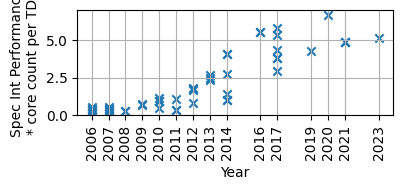

In [232]:
x_val = key_year
y_val = key_perf_per_tdp

fig, ax = plt.subplots(figsize=figsize)
ax.scatter(df[x_val], df[y_val], marker='x')

plt.xlabel('Year')
plt.ylabel("Spec Int Performance\n* core count per TDP")

# ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.set_xticks(df[x_val].unique())
ax.set_xticklabels(df[x_val].unique())

ax.set_title('')
plt.xticks(rotation=x_rotation)
ax.set_ylim(bottom=0)
plt.grid(True)
plt.tight_layout()
plt.savefig("../figures/tpc_cpus_spec_perf_tdp.pdf")
plt.show()
plt.close()